# Edge Filtering

### Roberts
The idea behind the Roberts cross operator is to approximate the gradient of an image through discrete differentiation which is achieved by computing the sum of the squares of the differences between diagonally adjacent pixels. It highlights regions of high spatial gradient which often correspond to edges.

G_x :

| +1 |  0 |
|:--:|:--:|
|  0 | -1 |

G_y :

| 0  | +1 |
|:--:|:--:|
| -1 | 0  |


$ \sqrt {G_x^2 + G_y^2}$  ---> detects diagonal edges

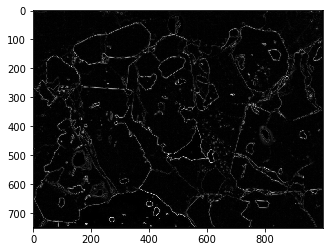

In [7]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np


img = cv2.imread('images/BSE_Image.jpg', 0)
# plt.imshow(img)


#Edge detection
from skimage.filters import roberts, sobel, scharr, prewitt, farid

roberts_img = roberts(img)
plt.imshow(roberts_img,cmap='gray')

# cv2.imshow("Roberts", roberts_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Sobel
Similar to Roberts - calculates gradient of the image. 
The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.

G_x :

|  1 |  0 | -1 |
|:--:|:--:|:--:|
|  2 |  0 | -2 |
|  1 |  0 | -1 |

G_y :

|  1 |  2 |  1 |
|:--:|:--:|:--:|
| 0  |  0 |  0 |
| -1 | -2 | -1 |


$ \sqrt {G_x^2 + G_y^2}$  ---> detects diagonal edges

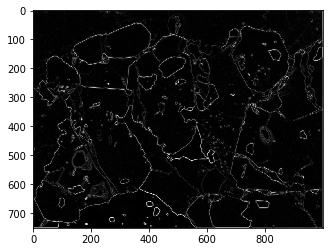

In [8]:
sobel_img = sobel(img)
plt.imshow(sobel_img,cmap='gray')

# cv2.imshow("Sobel", sobel_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Scharr
Typically used to identify gradients along the x-axis (dx = 1, dy = 0) and y-axis (dx = 0,dy = 1) independently. Performance is quite similar to Sobel filter.

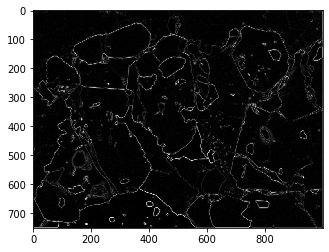

In [9]:
scharr_img = scharr(img)
plt.imshow(scharr_img,cmap='gray')

# cv2.imshow("Scharr", scharr_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Prewitt
The Prewitt operator is based on convolving the image with a small, separable, and integer valued filter in horizontal and vertical directions and is therefore relatively inexpensive in terms of computations like Sobel operator.

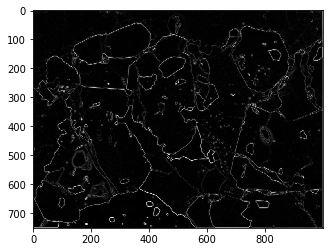

In [10]:
prewitt_img = prewitt(img)
plt.imshow(prewitt_img,cmap='gray')

# cv2.imshow("Prewitt", prewitt_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Farid
Farid and Simoncelli propose to use a pair of kernels, one for interpolation and another for differentiation (csimilar to Sobel). These kernels, of fixed sizes 5 x 5 and 7 x 7, are optimized so that the Fourier transform approximates their correct derivative relationship. 

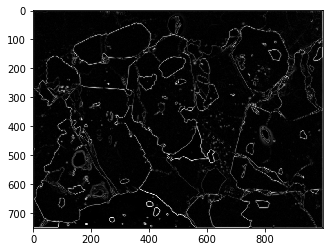

In [11]:
farid_img = farid(img)
plt.imshow(farid_img,cmap='gray')

# cv2.imshow("Farid", farid_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Canny
The Process of Canny edge detection algorithm can be broken down to 5 different steps:
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image to detect horizontal, vertical & diagonal edges
3. Apply non-maximum suppression to get rid of spurious response to edge detection (edge thinning)
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

**The output from a canny image is always a binary image**


**Unlike other filters, canny is found in** `skimage.feature`

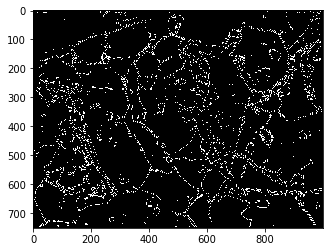

In [12]:
#Canny
canny_edge = cv2.Canny(img,50,80)

#Autocanny
sigma = 0.3
median = np.median(img)

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median)) # lower of double threshold
upper = int(min(255, (1.0 + sigma) * median))  # upper of double threshold
auto_canny = cv2.Canny(img, lower, upper)

plt.imshow(canny_edge,cmap='gray')


# cv2.imshow("Canny", canny_edge)
# cv2.imshow("Auto Canny", auto_canny)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

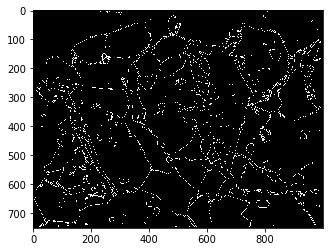

In [13]:
plt.imshow(auto_canny,cmap='gray')

---

(231, 263)


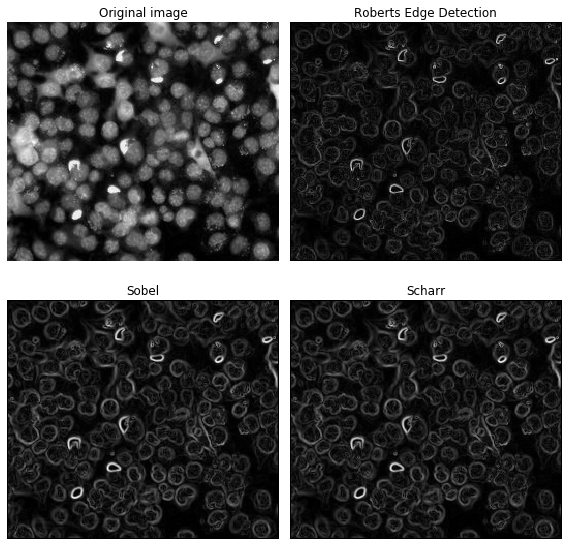

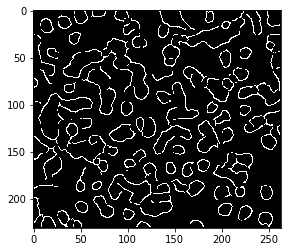

In [15]:
# Edge Detection


import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("images/test_image_cropped.jpg", as_gray=True)  #Convert to grey scale
print(img.shape)
#plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
#plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

#Another edge filter is Canny. This is not just a single operation
#It does noise reduction, gradient calculation, and edge tracking among other things. 
#Canny creates a binary file, true or false pixels. 
from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny,cmap='gray')

---

In [ ]:
# Neuron Edge detection:
    
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/Neuron.jpg", 0)
edges = cv2.Canny(img,100,200)   #Image, min and max values

# plt.imshow(edges,cmap='gray')

cv2.imshow("Original Image", img)
cv2.imshow("Canny", edges)

cv2.waitKey(0)          
cv2.destroyAllWindows() 